In [1]:
import pandas as pd

In [2]:
import json

def read_json_file(file_path):
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
            return data
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON from '{file_path}': {e}")

In [3]:
file_path = 'json/pickedData.json'  # Specify the path to your JSON file
data = read_json_file(file_path)


In [4]:
for category, category_data in data.items():
    df = pd.DataFrame(category_data)
    df.to_csv(f'csv/{category}.csv', index=False)

Analyze red wine

In [5]:
red = data['red']
df = pd.DataFrame(red)
df

,name,price,ISK_Per_ML_Ethanol,alcoholPercentage,volume_ML
0,Opera Prima Cabernet Sauvignon,5999,15.382,13.0,3000
1,Red Blend Portugal by Casa Santos Lima,6998,17.279,13.5,3000
2,Il Barone Rosso,6499,17.331,12.5,3000
3,JP Azeitao Syrah Castelao Aragonez,6789,17.408,13.0,3000
4,Galodoro Winmaker's Red,6648,17.728,12.5,3000
...,...,...,...,...,...
1395,Chateau Mouton Rothschild,131839,1302.114,13.5,750
1396,2015 Chateau Haut Brion,151989,1351.013,15.0,750
1397,Chateau Mouton Rothschild,142139,1403.842,13.5,750
1398,Chateau Mouton Rothschild,149349,1531.785,13.0,750


In [6]:
from vivino_scraper import query_wine_from_vivino

Add vivino ratings

In [7]:
df['vivino_rating'] = [query_wine_from_vivino(wine['name']) for wine in red ]

Opera Prima Cabernet Sauvignon
Score: 29
Red Blend Portugal by Casa Santos Lima
Score: 37
Il Barone Rosso
Score: 34
JP Azeitao Syrah Castelao Aragonez
Score: 38
Galodoro Winmaker's Red
Score: 37
Don Simon Seleccion Tempranillo
Score: 30
Lab Vinho Regional Lisboa rautt
Score: 38
Mamma Piccini Rosso di Toscana
Score: 36
Piccanti Rosso Toscana
Score: 34
Drostdy Hof Shiraz Merlot
Score: 32
Rendola Red Wine
Score: 39
Gauma Tempranillo
Score: 38
Lirico Tinto Premium Selection
Score: 29
Leva Reserve Cabernet Sauvignon Merlot
An error occurred while querying Vivino for Leva Reserve Cabernet Sauvignon Merlot: invalid literal for int() with base 10: '—'
Pata Negra Apasionado
Score: 36
Torre Solada Rosso
Score: 29
Gato Negro Cabernet Sauvignon
Score: 34
Ponte Villoni Rosso
Score: 34
Don Simon Merlot
Score: 35
Don Simon Cabernet Sauvignon
Score: 34
Colossal Reserva Tinto
An error occurred while querying Vivino for Colossal Reserva Tinto: invalid literal for int() with base 10: '—'
Stone Valley Shi

In [8]:
df

,name,price,ISK_Per_ML_Ethanol,alcoholPercentage,volume_ML,vivino_rating
0,Opera Prima Cabernet Sauvignon,5999,15.382,13.0,3000,29.0
1,Red Blend Portugal by Casa Santos Lima,6998,17.279,13.5,3000,37.0
2,Il Barone Rosso,6499,17.331,12.5,3000,34.0
3,JP Azeitao Syrah Castelao Aragonez,6789,17.408,13.0,3000,38.0
4,Galodoro Winmaker's Red,6648,17.728,12.5,3000,37.0
...,...,...,...,...,...,...
1395,Chateau Mouton Rothschild,131839,1302.114,13.5,750,46.0
1396,2015 Chateau Haut Brion,151989,1351.013,15.0,750,46.0
1397,Chateau Mouton Rothschild,142139,1403.842,13.5,750,46.0
1398,Chateau Mouton Rothschild,149349,1531.785,13.0,750,46.0


In [9]:
df.to_csv(f'csv/red_wine_vivino.csv', index=False)

In [10]:
filtered_df = df[df['vivino_rating'].notna()]


In [11]:
filtered_df

,name,price,ISK_Per_ML_Ethanol,alcoholPercentage,volume_ML,vivino_rating
0,Opera Prima Cabernet Sauvignon,5999,15.382,13.0,3000,29.0
1,Red Blend Portugal by Casa Santos Lima,6998,17.279,13.5,3000,37.0
2,Il Barone Rosso,6499,17.331,12.5,3000,34.0
3,JP Azeitao Syrah Castelao Aragonez,6789,17.408,13.0,3000,38.0
4,Galodoro Winmaker's Red,6648,17.728,12.5,3000,37.0
...,...,...,...,...,...,...
1395,Chateau Mouton Rothschild,131839,1302.114,13.5,750,46.0
1396,2015 Chateau Haut Brion,151989,1351.013,15.0,750,46.0
1397,Chateau Mouton Rothschild,142139,1403.842,13.5,750,46.0
1398,Chateau Mouton Rothschild,149349,1531.785,13.0,750,46.0


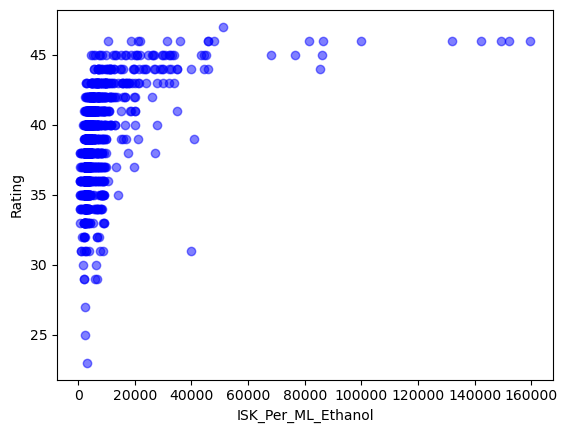

In [18]:
import matplotlib.pyplot as plt


plt.scatter(df['price'], df['vivino_rating'], color='blue', alpha=0.5)
# Add labels and title
plt.xlabel('price')
plt.ylabel('Rating')

plt.show()

In [13]:
df[75:100]

,name,price,ISK_Per_ML_Ethanol,alcoholPercentage,volume_ML,vivino_rating
75,Fuori Porta Sangiovese Vino Rosso,1948,20.779,12.5,750,38.0
76,El Sierro Reserva,2190,20.857,14.0,750,36.0
77,Castillo de Olite Tempranillo,2115,20.889,13.5,750,31.0
78,Casa Santos Lima OMG rautt,2198,20.933,14.0,750,37.0
79,Lab Reserva,2198,20.933,14.0,750,36.0
80,Viva Valentina Il Classico Rosso,4398,20.943,14.0,1500,38.0
81,Joseph Pellerin Cotes du Rhone Reserve,8799,20.950,14.0,3000,33.0
82,Sangre de Toro rautt,8490,20.963,13.5,3000,35.0
83,Adobe Cabernet Sauvignon Syrah Carmenere,8499,20.985,13.5,3000,35.0
84,Wolf Blass Red Label Shiraz Merlot Durif,8499,20.985,13.5,3000,34.0
